# Make Predictions with a Neural Network

In [1]:
# Initial imports
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-04-14 11:58:37.557436: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data Generation and Preprocessing

In [2]:
# Generate 1000 demo data samples with 2 features and two centers
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)

In [3]:
# Transforming y to a vertical vector
y = y.reshape(-1, 1)
y.shape

(1000, 1)

In [4]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y
df.head()

,Feature 1,Feature 2,Target
0,-3.058373,4.488258,0
1,-8.609739,-3.727149,1
2,1.371297,5.231074,0
3,-9.339176,-2.954447,1
4,-11.571786,-3.852755,1


<Axes: xlabel='Feature 1', ylabel='Feature 2'>

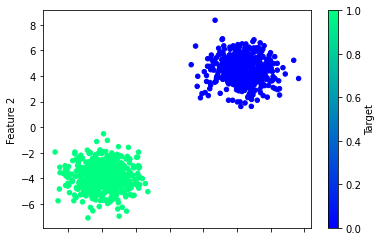

In [5]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [6]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Creating a Neural Network Model

In [8]:
# Create a sequential neural network model
neuron = Sequential()

In [9]:
# Add the input and the hidden layer to the model
number_inputs = 2
number_hidden_nodes = 1

neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [10]:
# Add the output layer
number_classes = 1

neuron.add(Dense(units=number_classes, activation="sigmoid"))

In [11]:
# Display model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


## Compiling a Neural Network Model

In [12]:
# Compile the model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## Fitting and Testing a Neural Network

In [13]:
# Fitting the model
model = neuron.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 921us/step - loss: 0.7801 - accuracy: 0.0000e+00
Epoch 2/100
24/24 [==============================] - 0s 812us/step - loss: 0.7588 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 768us/step - loss: 0.7395 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 767us/step - loss: 0.7225 - accuracy: 0.0080
Epoch 5/100
24/24 [==============================] - 0s 783us/step - loss: 0.7069 - accuracy: 0.1320
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.4613
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5067
Epoch 8/100
24/24 [==============================] - 0s 950us/step - loss: 0.6931 - accuracy: 0.5080
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6931 - ac

## Plotting Loss and Accuracy

In [14]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

<Axes: >

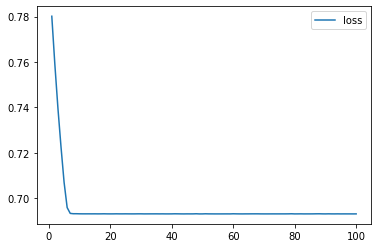

In [15]:
# Plot the loss
df.plot(y="loss")

<Axes: >

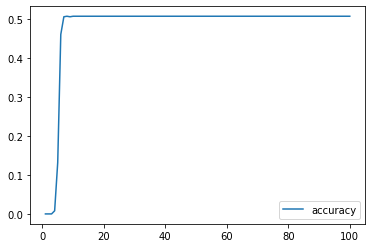

In [16]:
# Plot the accuracy
df.plot(y="accuracy")

### Evaluating the Model Performance

In [17]:
# Evaluate the model using testing data
model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

# Display evaluation results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6939 - accuracy: 0.4760 - 96ms/epoch - 12ms/step
Loss: 0.6939277052879333, Accuracy: 0.47600001096725464


## Making Predictions with a Neural Network Model

In [18]:
# Create 10 new samples of dummy data
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=1)

In [19]:
# Making predictions
predictions = (neuron.predict(new_X) > 0.5).astype("int32")

1/1 [==============================] - 0s 49ms/step


In [20]:
# Create a DataFrame to compare the predictions with the actual values
results = pd.DataFrame({"predictions": predictions.ravel(), "actual": new_y})

# Display sample data
results.head(10)

,predictions,actual
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
5,0,0
6,1,0
7,0,1
8,1,0
9,0,0
